In [11]:
# Read the June 15th power data from the data folder.
import pandas as pd
from pickup_utilities import *
df = pd.read_csv("../data/complete.csv")
df['tstamp'] = df.apply(tstampCalc, axis = 1)

In [12]:
df.head()

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
0,0,2012-02-01 00:00:00,2012,2,1,0,0,3.771,0.126,2.798,...,2,4,8,79,5,494,117.266000,0.237381,0.301358,0:00
1,1,2012-02-01 00:30:00,2012,2,1,0,30,3.555,0.110,1.809,...,2,4,8,79,5,494,179.440999,0.363241,0.838331,0:30
2,2,2012-02-01 01:00:00,2012,2,1,1,0,3.831,0.068,0.956,...,2,4,8,79,5,494,161.779999,0.327490,0.763164,1:00
3,3,2012-02-01 01:30:00,2012,2,1,1,30,2.852,0.085,0.925,...,2,4,8,79,5,494,144.735001,0.292986,0.704198,1:30
4,4,2012-02-01 02:00:00,2012,2,1,2,0,2.224,0.097,1.071,...,2,4,8,79,5,494,136.147000,0.275601,0.674146,2:00


In [13]:
# The 1900 refers to the time

df_Emmerdale_July_2_1900 = df.loc[df['day']==2].loc[df['month']==7].loc[df['year']==2013]
df_Emmerdale_July_2_1900 = df_Emmerdale_July_2_1900.set_index(df_Emmerdale_July_2_1900["tstamp"])
df_Emmerdale_July_2_1900.head(5)

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,48,2013-07-02 00:00:00,2013,7,2,0,0,25.396,2.228,15.948,...,121,81,85,672,36,4243,600.114,0.141436,0.219762,0:00
0:30,49,2013-07-02 00:30:00,2013,7,2,0,30,24.239,2.219,15.408,...,121,81,85,676,36,4247,537.911,0.126657,0.187917,0:30
1:00,50,2013-07-02 01:00:00,2013,7,2,1,0,23.195,2.222,13.896,...,121,81,85,676,36,4247,477.821,0.112508,0.146983,1:00
1:30,51,2013-07-02 01:30:00,2013,7,2,1,30,22.857,2.099,14.460,...,121,81,85,676,36,4247,448.503,0.105605,0.129875,1:30
2:00,52,2013-07-02 02:00:00,2013,7,2,2,0,20.936,2.146,13.483,...,121,81,85,676,36,4247,426.700,0.100471,0.116919,2:00


Emmerdale Soap Opera Analysis for July 2nd at 19:00 GMT for 6.2M

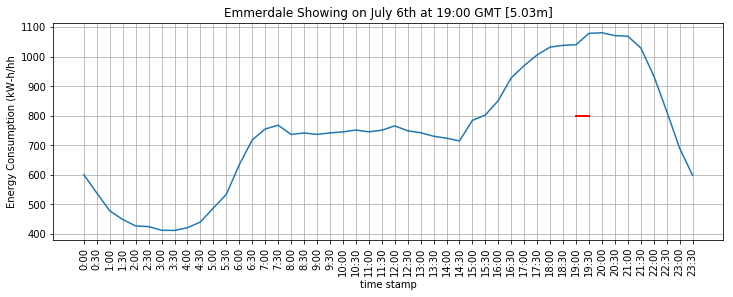

In [15]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_Emmerdale_July_2_1900["tstamp"],df_Emmerdale_July_2_1900["sigma"])
plt.xticks(rotation='vertical')
plt.title("Emmerdale Showing on July 6th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [800, 800], color='r', linestyle='-', linewidth=2)
plt.show()

In [16]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_Emmerdale_July_2_1900["A_sigma"] + df_Emmerdale_July_2_1900["B_sigma"] + df_Emmerdale_July_2_1900["C_sigma"]
Acorn2  = df_Emmerdale_July_2_1900["D_sigma"] + df_Emmerdale_July_2_1900["E_sigma"]
Acorn3  = df_Emmerdale_July_2_1900["F_sigma"] + df_Emmerdale_July_2_1900["G_sigma"] + df_Emmerdale_July_2_1900["H_sigma"] \
                                           + df_Emmerdale_July_2_1900["I_sigma"] + df_Emmerdale_July_2_1900["J_sigma"]
Acorn4  = df_Emmerdale_July_2_1900["K_sigma"] + df_Emmerdale_July_2_1900["L_sigma"] + df_Emmerdale_July_2_1900["M_sigma"] \
                                           + df_Emmerdale_July_2_1900["N_sigma"]
Acorn5  = df_Emmerdale_July_2_1900["O_sigma"] + df_Emmerdale_July_2_1900["P_sigma"] + df_Emmerdale_July_2_1900["Q_sigma"]

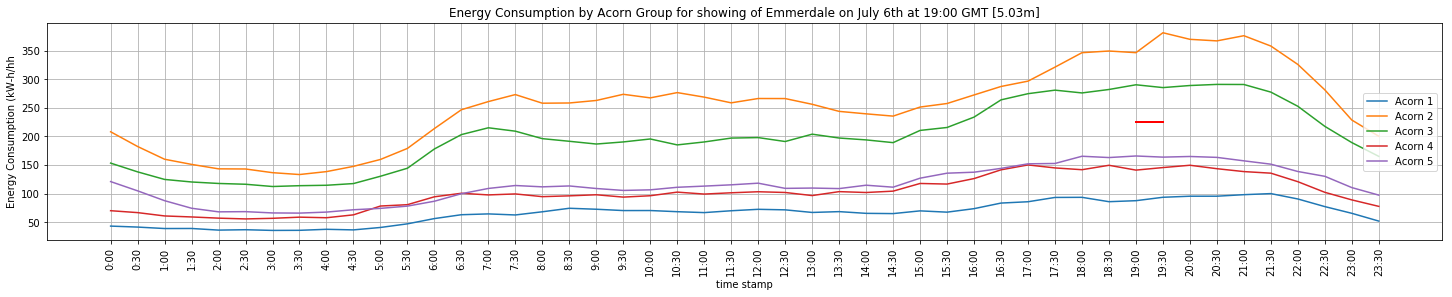

In [17]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Emmerdale_July_2_1900["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Emmerdale_July_2_1900["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Emmerdale_July_2_1900["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Emmerdale_July_2_1900["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Emmerdale_July_2_1900["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Energy Consumption by Acorn Group for showing of Emmerdale on July 6th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [225, 225], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [18]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['18:00']
Acorn2 = Acorn2 / Acorn2['18:00']
Acorn3 = Acorn3 / Acorn3['18:00']
Acorn4 = Acorn4 / Acorn4['18:00']
Acorn5 = Acorn5 / Acorn5['18:00']

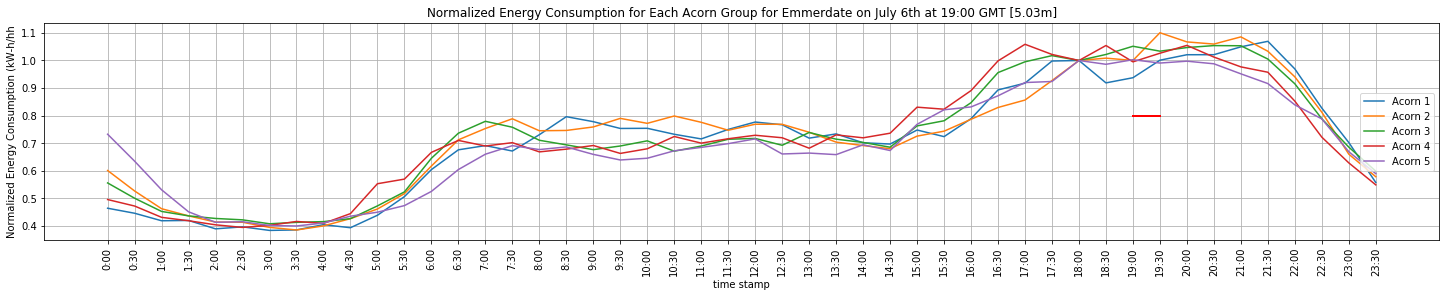

In [19]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Emmerdale_July_2_1900["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Emmerdale_July_2_1900["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Emmerdale_July_2_1900["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Emmerdale_July_2_1900["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Emmerdale_July_2_1900["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Normalized Energy Consumption for Each Acorn Group for Emmerdate on July 6th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [0.8, 0.8], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

Emmerdale Soap Opera Analysis for July 3rd at 19:00 GMT for 6.2M

In [21]:
df_Emmerdale_July_3_1900 = df.loc[df['day']==3].loc[df['month']==7].loc[df['year']==2013]
df_Emmerdale_July_3_1900 = df_Emmerdale_July_3_1900.set_index(df_Emmerdale_July_3_1900["tstamp"])
df_Emmerdale_July_3_1900.head(5)

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,96,2013-07-03 00:00:00,2013,7,3,0,0,29.865,2.405,16.871,...,121,81,85,676,36,4246,589.341,0.138799,0.211871,0:00
0:30,97,2013-07-03 00:30:00,2013,7,3,0,30,25.058,2.120,15.155,...,121,80,84,673,36,4239,524.015,0.123618,0.179405,0:30
1:00,98,2013-07-03 01:00:00,2013,7,3,1,0,22.488,2.131,13.753,...,121,80,84,673,36,4239,474.348,0.111901,0.148668,1:00
1:30,99,2013-07-03 01:30:00,2013,7,3,1,30,25.211,1.999,13.530,...,121,80,84,673,36,4239,441.080,0.104053,0.130271,1:30
2:00,100,2013-07-03 02:00:00,2013,7,3,2,0,23.126,1.942,12.689,...,121,80,84,673,36,4239,421.815,0.099508,0.118396,2:00


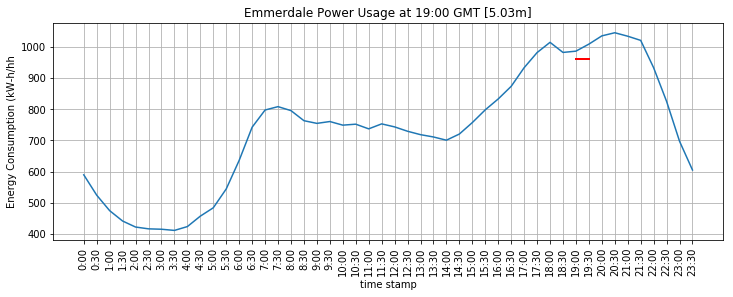

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_Emmerdale_July_3_1900["tstamp"],df_Emmerdale_July_3_1900["sigma"])
plt.xticks(rotation='vertical')
plt.title("Emmerdale Power Usage at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [960, 960], color='r', linestyle='-', linewidth=2)
plt.show()

In [23]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_Emmerdale_July_3_1900["A_sigma"] + df_Emmerdale_July_3_1900["B_sigma"] + df_Emmerdale_July_3_1900["C_sigma"]
Acorn2  = df_Emmerdale_July_3_1900["D_sigma"] + df_Emmerdale_July_3_1900["E_sigma"]
Acorn3  = df_Emmerdale_July_3_1900["F_sigma"] + df_Emmerdale_July_3_1900["G_sigma"] + df_Emmerdale_July_3_1900["H_sigma"] \
                                           + df_Emmerdale_July_3_1900["I_sigma"] + df_Emmerdale_July_3_1900["J_sigma"]
Acorn4  = df_Emmerdale_July_3_1900["K_sigma"] + df_Emmerdale_July_3_1900["L_sigma"] + df_Emmerdale_July_3_1900["M_sigma"] \
                                           + df_Emmerdale_July_3_1900["N_sigma"]
Acorn5  = df_Emmerdale_July_3_1900["O_sigma"] + df_Emmerdale_July_3_1900["P_sigma"] + df_Emmerdale_July_3_1900["Q_sigma"]

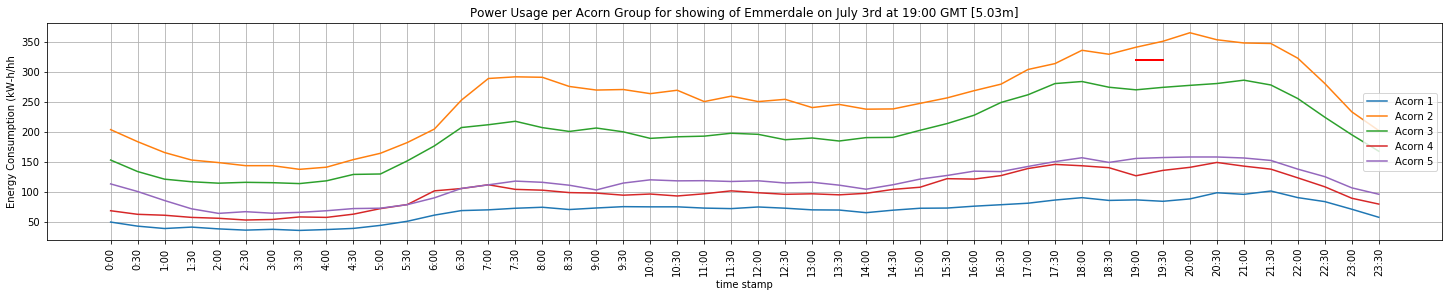

In [24]:
plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Emmerdale_July_3_1900["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Emmerdale_July_3_1900["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Emmerdale_July_3_1900["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Emmerdale_July_3_1900["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Emmerdale_July_3_1900["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Power Usage per Acorn Group for showing of Emmerdale on July 3rd at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [320, 320], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [25]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['18:00']
Acorn2 = Acorn2 / Acorn2['18:00']
Acorn3 = Acorn3 / Acorn3['18:00']
Acorn4 = Acorn4 / Acorn4['18:00']
Acorn5 = Acorn5 / Acorn5['18:00']

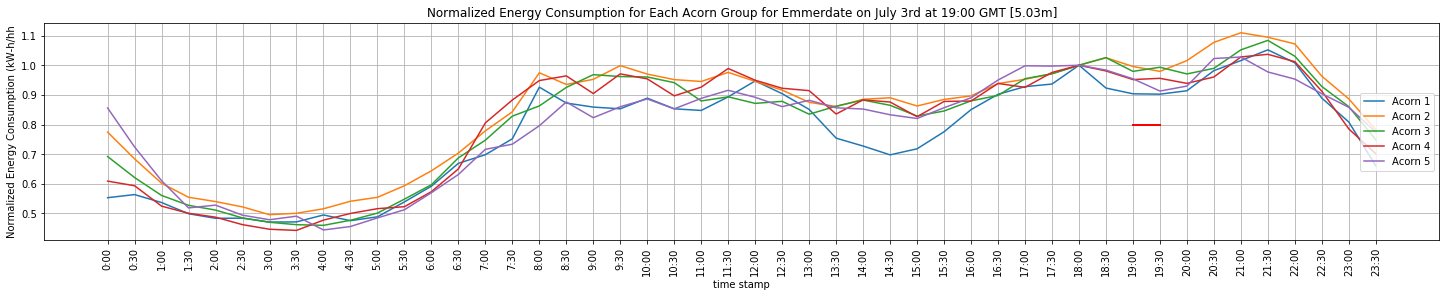

In [51]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Emmerdale_July_3_1900["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Emmerdale_July_3_1900["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Emmerdale_July_3_1900["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Emmerdale_July_3_1900["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Emmerdale_July_3_1900["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Normalized Energy Consumption for Each Acorn Group for Emmerdate on July 3rd at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [0.8, 0.8], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

Emmerdale Soap Opera Analysis on July 4th at 19:00 for audience of 5.3M

In [27]:
df_Coronation_July_4_1900 = df.loc[df['day']==4].loc[df['month']==7].loc[df['year']==2013]
df_Coronation_July_4_1900 = df_Coronation_July_4_1900.set_index(df_Coronation_July_4_1900["tstamp"])
df_Coronation_July_4_1900.head(5)

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,144,2013-07-04 00:00:00,2013,7,4,0,0,29.014,2.639,18.201,...,121,80,84,673,36,4239,606.981,0.143190,0.215893,0:00
0:30,145,2013-07-04 00:30:00,2013,7,4,0,30,28.022,2.261,15.634,...,121,79,84,672,37,4230,531.826,0.125727,0.185753,0:30
1:00,146,2013-07-04 01:00:00,2013,7,4,1,0,24.486,2.211,13.968,...,121,79,84,672,37,4230,478.652,0.113157,0.154865,1:00
1:30,147,2013-07-04 01:30:00,2013,7,4,1,30,24.564,2.150,13.118,...,121,79,84,672,37,4230,453.761,0.107272,0.145251,1:30
2:00,148,2013-07-04 02:00:00,2013,7,4,2,0,22.637,2.347,12.923,...,121,79,84,672,37,4229,429.771,0.101625,0.129856,2:00


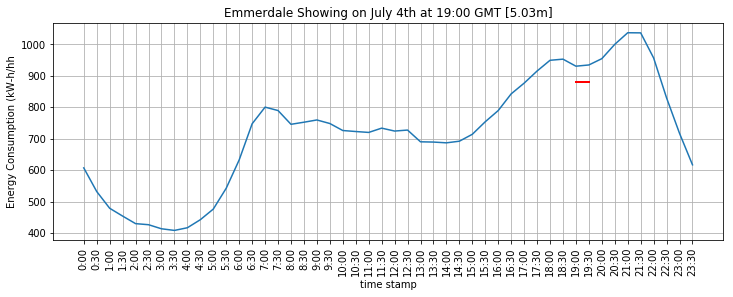

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_Coronation_July_4_1900["tstamp"],df_Coronation_July_4_1900["sigma"])
plt.xticks(rotation='vertical')
plt.title("Emmerdale Showing on July 4th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [880, 880], color='r', linestyle='-', linewidth=2)
plt.show()

In [29]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_Coronation_July_4_1900["A_sigma"] + df_Coronation_July_4_1900["B_sigma"] + df_Coronation_July_4_1900["C_sigma"]
Acorn2  = df_Coronation_July_4_1900["D_sigma"] + df_Coronation_July_4_1900["E_sigma"]
Acorn3  = df_Coronation_July_4_1900["F_sigma"] + df_Coronation_July_4_1900["G_sigma"] + df_Coronation_July_4_1900["H_sigma"] \
                                           + df_Coronation_July_4_1900["I_sigma"] + df_Coronation_July_4_1900["J_sigma"]
Acorn4  = df_Coronation_July_4_1900["K_sigma"] + df_Coronation_July_4_1900["L_sigma"] + df_Coronation_July_4_1900["M_sigma"] \
                                           + df_Coronation_July_4_1900["N_sigma"]
Acorn5  = df_Coronation_July_4_1900["O_sigma"] + df_Coronation_July_4_1900["P_sigma"] + df_Coronation_July_4_1900["Q_sigma"]

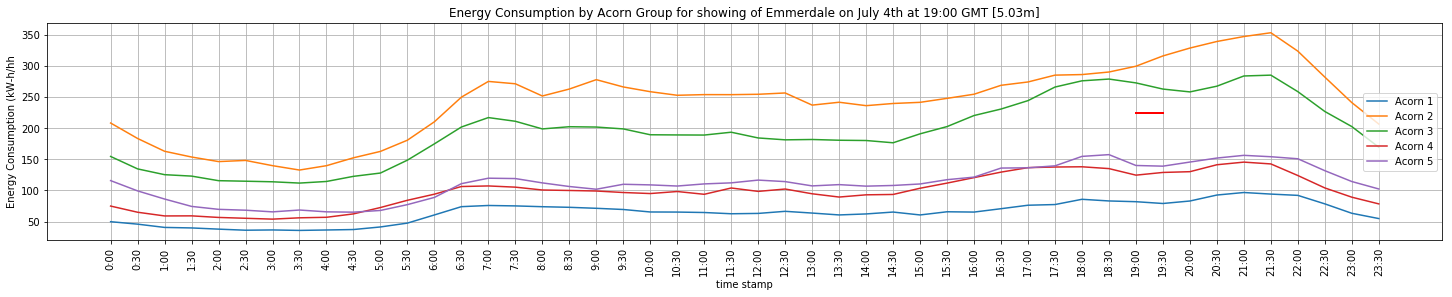

In [30]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Coronation_July_4_1900["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Coronation_July_4_1900["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Coronation_July_4_1900["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Coronation_July_4_1900["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Coronation_July_4_1900["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Energy Consumption by Acorn Group for showing of Emmerdale on July 4th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [225, 225], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [31]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['18:00']
Acorn2 = Acorn2 / Acorn2['18:00']
Acorn3 = Acorn3 / Acorn3['18:00']
Acorn4 = Acorn4 / Acorn4['18:00']
Acorn5 = Acorn5 / Acorn5['18:00']

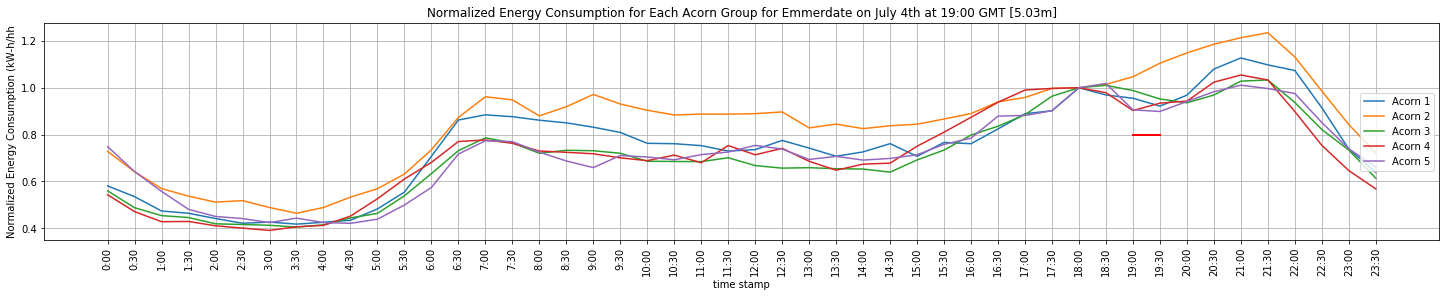

In [32]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Coronation_July_4_1900["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Coronation_July_4_1900["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Coronation_July_4_1900["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Coronation_July_4_1900["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Coronation_July_4_1900["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Normalized Energy Consumption for Each Acorn Group for Emmerdate on July 4th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [0.8, 0.8], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

Emmerdale Soap Opera Analysis on July 5th at 19:00 GMT for audience of 5.9M

In [33]:
df_Emmerdale_July_5_1900 = df.loc[df['day']==5].loc[df['month']==7].loc[df['year']==2013]
df_Emmerdale_July_5_1900 = df_Emmerdale_July_5_1900.set_index(df_Emmerdale_July_5_1900["tstamp"])
df_Emmerdale_July_5_1900.head(5)

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,192,2013-07-05 00:00:00,2013,7,5,0,0,29.717,2.272,17.421,...,121,79,84,672,37,4230,598.258001,0.141432,0.207523,0:00
0:30,193,2013-07-05 00:30:00,2013,7,5,0,30,26.484,2.146,15.543,...,121,80,84,670,37,4228,538.704001,0.127413,0.177239,0:30
1:00,194,2013-07-05 01:00:00,2013,7,5,1,0,24.046,2.285,14.393,...,121,80,84,670,37,4228,476.887000,0.112793,0.144265,1:00
1:30,195,2013-07-05 01:30:00,2013,7,5,1,30,22.713,2.073,14.311,...,121,80,84,670,37,4228,451.107001,0.106695,0.126687,1:30
2:00,196,2013-07-05 02:00:00,2013,7,5,2,0,21.399,2.130,13.375,...,121,80,84,670,37,4228,432.344000,0.102257,0.117754,2:00


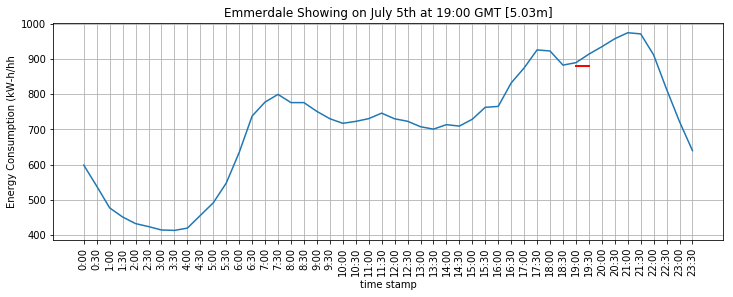

In [34]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_Emmerdale_July_5_1900["tstamp"],df_Emmerdale_July_5_1900["sigma"])
plt.xticks(rotation='vertical')
plt.title("Emmerdale Showing on July 5th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [880, 880], color='r', linestyle='-', linewidth=2)
plt.show()

In [35]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_Emmerdale_July_5_1900["A_sigma"] + df_Emmerdale_July_5_1900["B_sigma"] + df_Emmerdale_July_5_1900["C_sigma"]
Acorn2  = df_Emmerdale_July_5_1900["D_sigma"] + df_Emmerdale_July_5_1900["E_sigma"]
Acorn3  = df_Emmerdale_July_5_1900["F_sigma"] + df_Emmerdale_July_5_1900["G_sigma"] + df_Emmerdale_July_5_1900["H_sigma"] \
                                           + df_Emmerdale_July_5_1900["I_sigma"] + df_Emmerdale_July_5_1900["J_sigma"]
Acorn4  = df_Emmerdale_July_5_1900["K_sigma"] + df_Emmerdale_July_5_1900["L_sigma"] + df_Emmerdale_July_5_1900["M_sigma"] \
                                           + df_Emmerdale_July_5_1900["N_sigma"]
Acorn5  = df_Emmerdale_July_5_1900["O_sigma"] + df_Emmerdale_July_5_1900["P_sigma"] + df_Emmerdale_July_5_1900["Q_sigma"]

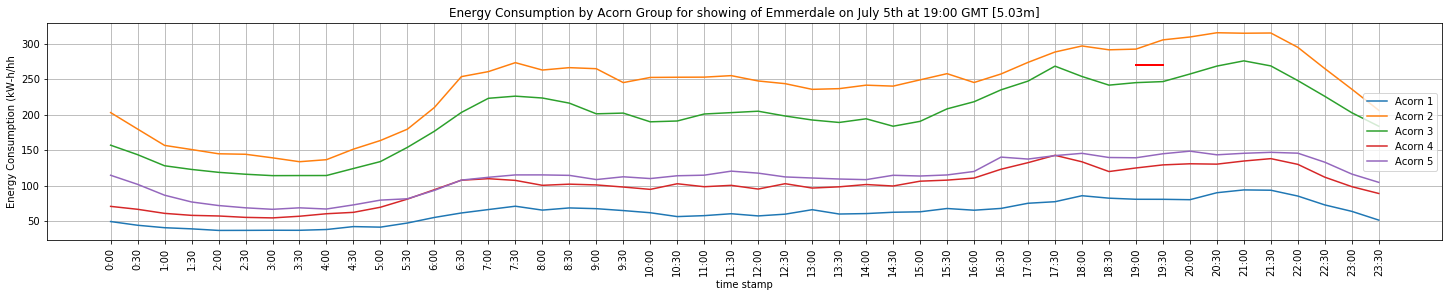

In [36]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Emmerdale_July_5_1900["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Emmerdale_July_5_1900["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Emmerdale_July_5_1900["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Emmerdale_July_5_1900["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Emmerdale_July_5_1900["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Energy Consumption by Acorn Group for showing of Emmerdale on July 5th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [270, 270], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [37]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['18:00']
Acorn2 = Acorn2 / Acorn2['18:00']
Acorn3 = Acorn3 / Acorn3['18:00']
Acorn4 = Acorn4 / Acorn4['18:00']
Acorn5 = Acorn5 / Acorn5['18:00']

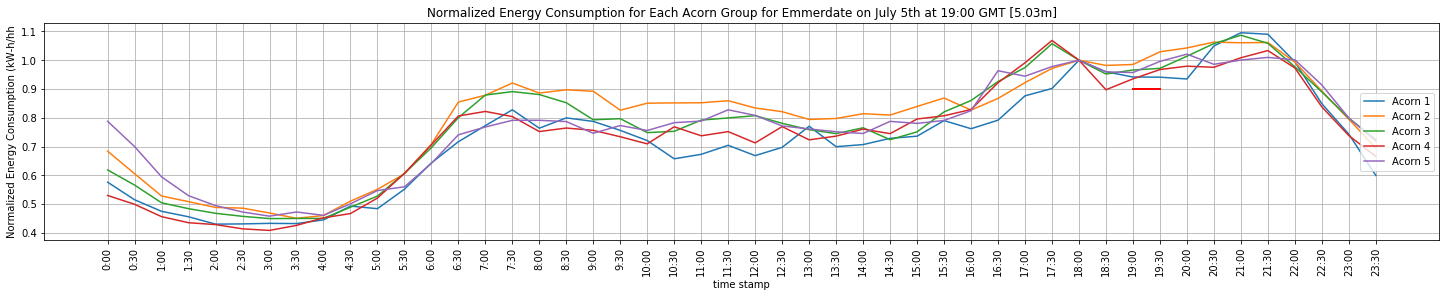

In [38]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Emmerdale_July_5_1900["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Emmerdale_July_5_1900["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Emmerdale_July_5_1900["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Emmerdale_July_5_1900["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Emmerdale_July_5_1900["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Normalized Energy Consumption for Each Acorn Group for Emmerdate on July 5th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [0.9, 0.9], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

Emmerdale Soap Opera Analysis for July 5th at 20:00 GMT for audience of 6.1M

In [39]:
df_Emmerdale_July_5_2000 = df.loc[df['day']==5].loc[df['month']==7].loc[df['year']==2013]
df_Emmerdale_July_5_2000 = df_Emmerdale_July_5_2000.set_index(df_Emmerdale_July_5_2000["tstamp"])
df_Emmerdale_July_5_2000.head(5)

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,192,2013-07-05 00:00:00,2013,7,5,0,0,29.717,2.272,17.421,...,121,79,84,672,37,4230,598.258001,0.141432,0.207523,0:00
0:30,193,2013-07-05 00:30:00,2013,7,5,0,30,26.484,2.146,15.543,...,121,80,84,670,37,4228,538.704001,0.127413,0.177239,0:30
1:00,194,2013-07-05 01:00:00,2013,7,5,1,0,24.046,2.285,14.393,...,121,80,84,670,37,4228,476.887000,0.112793,0.144265,1:00
1:30,195,2013-07-05 01:30:00,2013,7,5,1,30,22.713,2.073,14.311,...,121,80,84,670,37,4228,451.107001,0.106695,0.126687,1:30
2:00,196,2013-07-05 02:00:00,2013,7,5,2,0,21.399,2.130,13.375,...,121,80,84,670,37,4228,432.344000,0.102257,0.117754,2:00


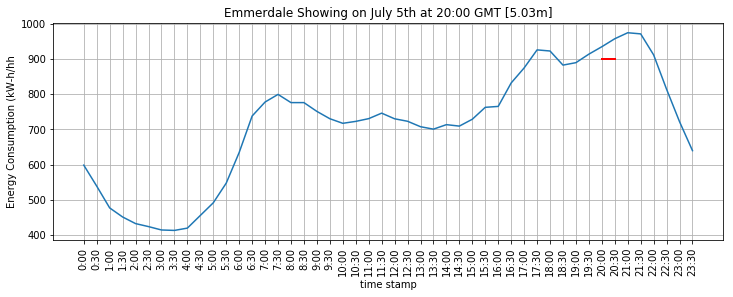

In [40]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_Emmerdale_July_5_2000["tstamp"],df_Emmerdale_July_5_2000["sigma"])
plt.xticks(rotation='vertical')
plt.title("Emmerdale Showing on July 5th at 20:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['20:00', '20:30'], [900, 900], color='r', linestyle='-', linewidth=2)
plt.show()

In [41]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_Emmerdale_July_5_2000["A_sigma"] + df_Emmerdale_July_5_2000["B_sigma"] + df_Emmerdale_July_5_2000["C_sigma"]
Acorn2  = df_Emmerdale_July_5_2000["D_sigma"] + df_Emmerdale_July_5_2000["E_sigma"]
Acorn3  = df_Emmerdale_July_5_2000["F_sigma"] + df_Emmerdale_July_5_2000["G_sigma"] + df_Emmerdale_July_5_2000["H_sigma"] \
                                           + df_Emmerdale_July_5_2000["I_sigma"] + df_Emmerdale_July_5_2000["J_sigma"]
Acorn4  = df_Emmerdale_July_5_2000["K_sigma"] + df_Emmerdale_July_5_2000["L_sigma"] + df_Emmerdale_July_5_2000["M_sigma"] \
                                           + df_Emmerdale_July_5_2000["N_sigma"]
Acorn5  = df_Emmerdale_July_5_2000["O_sigma"] + df_Emmerdale_July_5_2000["P_sigma"] + df_Emmerdale_July_5_2000["Q_sigma"]

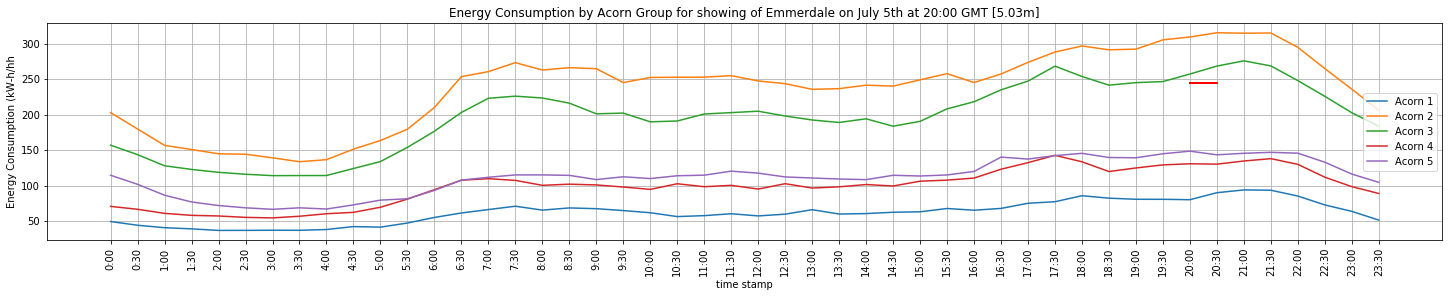

In [42]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Emmerdale_July_5_2000["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Emmerdale_July_5_2000["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Emmerdale_July_5_2000["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Emmerdale_July_5_2000["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Emmerdale_July_5_2000["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Energy Consumption by Acorn Group for showing of Emmerdale on July 5th at 20:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['20:00', '20:30'], [245, 245], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [43]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:00']
Acorn2 = Acorn2 / Acorn2['19:00']
Acorn3 = Acorn3 / Acorn3['19:00']
Acorn4 = Acorn4 / Acorn4['19:00']
Acorn5 = Acorn5 / Acorn5['19:00']

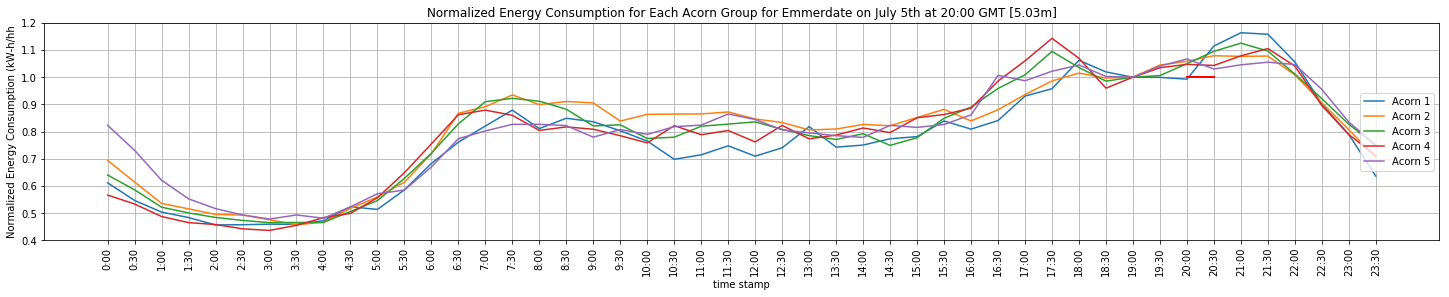

In [44]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Emmerdale_July_5_2000["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Emmerdale_July_5_2000["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Emmerdale_July_5_2000["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Emmerdale_July_5_2000["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Emmerdale_July_5_2000["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Normalized Energy Consumption for Each Acorn Group for Emmerdate on July 5th at 20:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['20:00', '20:30'], [1.0, 1.0], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

Emmerdale Soap Opera Analysis on July 6th at 19:00 GMT for audience of 4.9M

In [45]:
df_Emmerdale_July_6_1900 = df.loc[df['day']==6].loc[df['month']==7].loc[df['year']==2013]
df_Emmerdale_July_6_1900 = df_Emmerdale_July_6_1900.set_index(df_Emmerdale_July_6_1900["tstamp"])
df_Emmerdale_July_6_1900.head(5)

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,240,2013-07-06 00:00:00,2013,7,6,0,0,24.457,2.596,18.090,...,121,80,84,670,37,4228,634.270,0.150017,0.204795,0:00
0:30,241,2013-07-06 00:30:00,2013,7,6,0,30,25.069,2.356,18.570,...,121,80,84,671,37,4229,571.194,0.135066,0.178036,0:30
1:00,242,2013-07-06 01:00:00,2013,7,6,1,0,24.819,2.225,16.764,...,121,80,84,671,37,4229,506.994,0.119885,0.148720,1:00
1:30,243,2013-07-06 01:30:00,2013,7,6,1,30,24.676,2.174,13.878,...,121,80,84,671,37,4229,465.234,0.110010,0.126147,1:30
2:00,244,2013-07-06 02:00:00,2013,7,6,2,0,22.990,2.478,14.000,...,121,80,84,671,37,4229,455.586,0.107729,0.130866,2:00


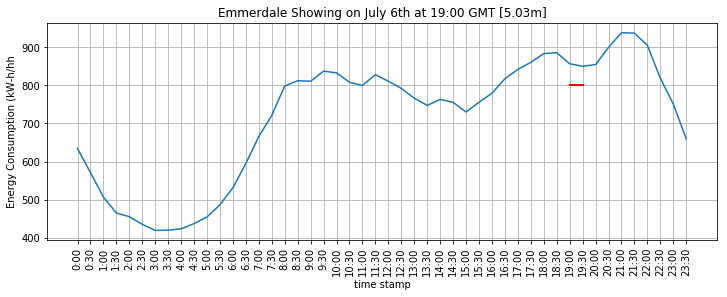

In [46]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_Emmerdale_July_6_1900["tstamp"],df_Emmerdale_July_6_1900["sigma"])
plt.xticks(rotation='vertical')
plt.title("Emmerdale Showing on July 6th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [800, 800], color='r', linestyle='-', linewidth=2)
plt.show()

In [47]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_Emmerdale_July_6_1900["A_sigma"] + df_Emmerdale_July_6_1900["B_sigma"] + df_Emmerdale_July_6_1900["C_sigma"]
Acorn2  = df_Emmerdale_July_6_1900["D_sigma"] + df_Emmerdale_July_6_1900["E_sigma"]
Acorn3  = df_Emmerdale_July_6_1900["F_sigma"] + df_Emmerdale_July_6_1900["G_sigma"] + df_Emmerdale_July_6_1900["H_sigma"] \
                                           + df_Emmerdale_July_6_1900["I_sigma"] + df_Emmerdale_July_6_1900["J_sigma"]
Acorn4  = df_Emmerdale_July_6_1900["K_sigma"] + df_Emmerdale_July_6_1900["L_sigma"] + df_Emmerdale_July_6_1900["M_sigma"] \
                                           + df_Emmerdale_July_6_1900["N_sigma"]
Acorn5  = df_Emmerdale_July_6_1900["O_sigma"] + df_Emmerdale_July_6_1900["P_sigma"] + df_Emmerdale_July_6_1900["Q_sigma"]

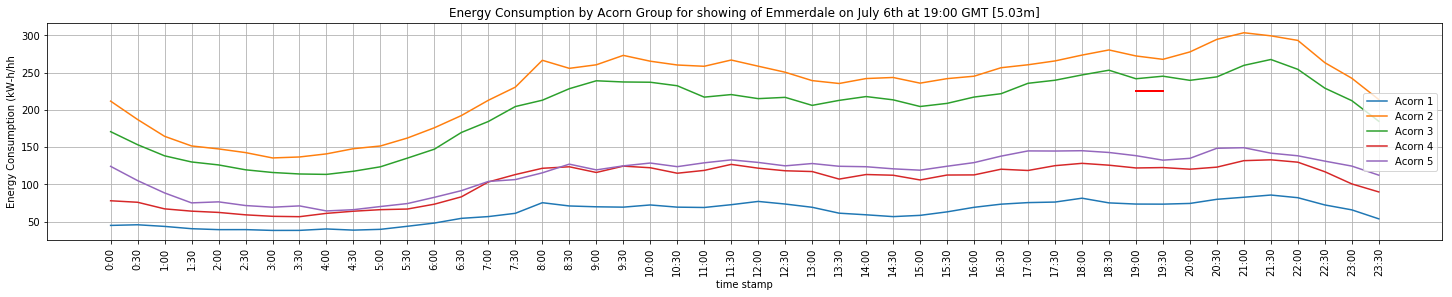

In [48]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Emmerdale_July_6_1900["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Emmerdale_July_6_1900["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Emmerdale_July_6_1900["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Emmerdale_July_6_1900["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Emmerdale_July_6_1900["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Energy Consumption by Acorn Group for showing of Emmerdale on July 6th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [225, 225], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [49]:
Acorn1 = Acorn1 / Acorn1['18:00']
Acorn2 = Acorn2 / Acorn2['18:00']
Acorn3 = Acorn3 / Acorn3['18:00']
Acorn4 = Acorn4 / Acorn4['18:00']
Acorn5 = Acorn5 / Acorn5['18:00']

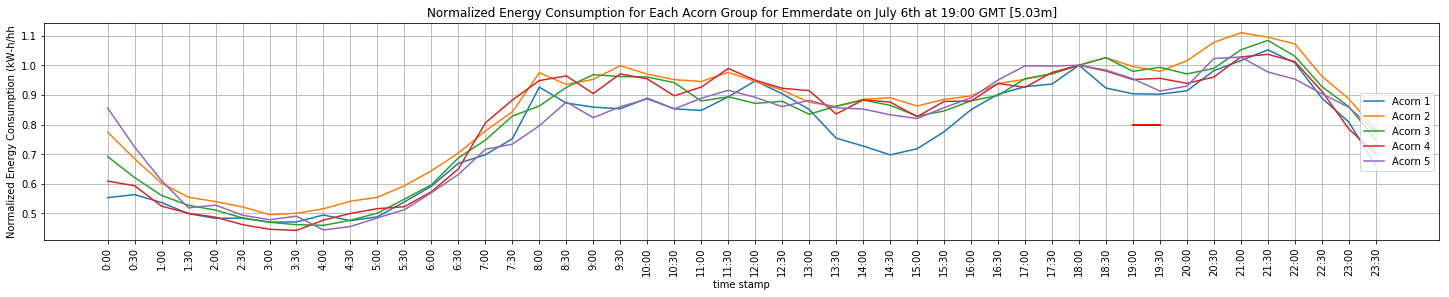

In [50]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_Emmerdale_July_6_1900["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Emmerdale_July_6_1900["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Emmerdale_July_6_1900["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Emmerdale_July_6_1900["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Emmerdale_July_6_1900["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Normalized Energy Consumption for Each Acorn Group for Emmerdate on July 6th at 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '19:30'], [0.8, 0.8], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()